# Souborový systém

Přednášky k prostudování zde:

[http://vyuka.ookami.cz/materialy/python/files/basics.xml](http://vyuka.ookami.cz/materialy/python/files/basics.xml)

[http://vyuka.ookami.cz/materialy/python/files/pathlib.xml](http://vyuka.ookami.cz/materialy/python/files/pathlib.xml)

## Poznámka ke Colaboratory notebookům

Při práci v google colaboratory, kde máte k dispozici celý virtuální stroj. Shellové příkazy se spouští pomocí `!` (platí pro jupyter obecně) a dokonce je jde míchat s pythonovými příkazy:

In [65]:
# prikazy shell jde michat s prikazy pythonu:
!top -n 1 | head -5
print("-" * 79)
!df -h | grep "/dev"

=top - 12:32:27 up  1:46,  0 users,  load average: 0.21, 0.23, 0.19
Tasks:  19 total,   2 running,  16 sleeping,   0 stopped,   1 zombie
%Cpu(s):  3.2 us,  3.2 sy,  0.0 ni, 93.5 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
MiB Mem :  12979.0 total,   9517.5 free,    673.0 used,   2788.5 buff/cache
MiB Swap:      0.0 total,      0.0 free,      0.0 used.  12015.7 avail Mem 
-------------------------------------------------------------------------------
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
/dev/sda1        70G   43G   27G  62% /kaggle/input


Protože po odpojení se všechna data ve virtuálním google colab stroji smažou, můžete si připojit gdrive a práci si průběžně ukládat tam (nejsem si jist, že to bude fungovat i mimo colab, ale lokálně si můžete synchronizovat gdrive jinak):

In [ ]:
#from google.colab import drive
## mount GDRIVE
#drive.mount('/content/gdrive')

In [ ]:
# před cd není vykřičník - potřebujeme změnit dir v ipython instanci
# viz https://stackoverflow.com/questions/36512527/cd-vs-cd-vs-cd-in-ipython
#cd '/content/gdrive/My Drive'

In [66]:
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


## Práce se soubory

V následující části jsme čerpali z článku na [RealPython](https://realpython.com/working-with-files-in-python/)


![alt text](https://files.realpython.com/media/Practical-Recipes-for-Working-With-Multiple-Files-in-Python_Watermarked.4ff8c72dc712.jpg)

### Funkce open, readline, read, write a klazule with

Soubor otevřete pomocí vestavěné funkce `open`, která kromě jména souboru dva důležité parametry `mode` a `encoding`. Doporučuji nevynechávat, protože se pak váš kód stává platformně závislým (defaultní kódování je dané OS).

Možné hodnoty pro parametr `mode` jsou:
* r - pouze pro čtení
* w - jen pro zápis (pokud soubor existuje, obsah bude vymazán)
* x - exkluzivní vytvoření pro zápis (pokud soubor už existuje vyhodí výjimku `FileExistsError`)
* a - append / přidávání na konec
* r+ - pro čtení i zápis a musí existovat
* w+ - pro čtení i zápis a neprázdný soubor bude vymazán

Všechny hodnoty lze sufixovat buď pomocí **t** pro práci v textovém režimu, nebo **b** pro práci s binárními daty; tedy např.: 'rb', 'wt+', 'at'... defaultní mód je **r** (respektive rt).


In [ ]:
# otevřu soubor v dané cestě, návratem je otevřený stream pod identifikátorem "file"
file = open("/content/sample_data/california_housing_test.csv", mode="rt", encoding="utf-8")

# pracuji se souborem po jedotlivých řádcích
for i in range(5):
  line = file.readline() #readline načte jednu řádku textového souboru
  print(line, end="")

# uzavřu soubor
file.close()

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000


Dvojici příkazů `open` - `close` lze nahradit klauzulí `with`:

In [67]:
with open("/content/sample_data/california_housing_test.csv", mode="rt", encoding="utf-8") as f:
  test = f.read() # načte celý soubor do stringu

lines = test.split()  # proměnné nastavené uvnitř with jsou vidět i později mimo něj
print("\n".join(lines[:5]))

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000


Podstatné je, že při použití `with` nemusím soubor zavírat. Funkce `open` totiž vrací objekt (**Context Manager**), který má definované magické metody `__enter__` a `__exit__`, díky nimž umí nahradit následující `try`/`finally` block. `with` tedy soubor po projití bloku kódu zase uzavře. Výhodné je to i ve chvíli, kdy ladím kód a ten mi nečekaně spadne - i v takovém případě s soubor korektně uzavře. Protože je práce se soubory vždy bufferovaná, neuzavření souboru může často způsobit, že se část dat vůbec nazpíše. Zapsání lze vynutit zavoláním `flush()` na otevřeném streamu.
`with` tedy můžeme brát jako další příklad syntaktického cukru v jazyce python.

In [68]:
# ekvivalentní, ale nedoporučený kód k příkladu with výše
file = open("/content/sample_data/california_housing_test.csv", mode="rt", encoding="utf-8")
try:
  test5 = file.read(5) # načte 5 znaků nebo bytů (pro binární soubory)
  file.seek(0) # vrátíme ukazatel čtení na začátek
  test = file.read() # načte celý soubor do stringu
finally:
  file.close()

lines = test.split()
print(f'{test5}')
print("\n".join(lines[:5]))

"long
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000
-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000
-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000
-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000


Z otevřeného streamu jde o souboru zjistit mnoho informací:

In [ ]:
with open("/content/sample_data/california_housing_test.csv", mode="rt", encoding="utf-8") as f:
  print(f'mod = {f.mode}')
  print(f'enc = {f.encoding}')
  print(f'r = {f.readable()}')
  print(f'w = {f.writable()}')
  print(f'seek = {f.seekable()}')  # jde se souborem pracovat v režimu náhodného přístupu -> seek(), tell() a truncate()
  print(f'closed 1 = {f.closed}')
print(f'closed 2 = {f.closed}')

mod = rt
enc = utf-8
r = True
w = False
seek = True
closed 1 = False
closed 2 = True


Pokud chceme zapisovat do souboru, použijeme metodu `write`

In [69]:
with open("/content/bin.txt", mode="w+t", encoding="utf-8") as file:
  file.write("First line")
  file.write("(adding something to line 1)")
  file.write("\n")
  file.write("Second line")

In [70]:
!cat /content/bin.txt

First line(adding something to line 1)
Second line

Pozor, narozdíl od funkce `print` příkaz `write` očekává právě jeden argument:

In [71]:
f = "/content/bin.txt"
with open(f, mode="wt", encoding="utf-8") as file:
  file.write(f"Czech letters: ěščřžýáíé 🚩\nfilename: {f}")
  file.write("First line", "\n", "second line")  # toto fungovat nebude

TypeError: TextIOWrapper.write() takes exactly one argument (3 given)

In [72]:
!cat /content/bin.txt

Czech letters: ěščřžýáíé 🚩
filename: /content/bin.txt

### Textové vs. binární soubory

Důležité je si uvědomit, že **textové soubory jsou načítány a zapisovány po znacích** (často mohou být vícebajtové), kdežto binární po bajtech. Navíc se při práci s textovými soubory automaticky v obou směrech konvertují konce řádků (`\r`, `\r\n`, `\n` na pracovní `\n`).

In [73]:
f = "/content/bin.txt"
with open(f, mode="rt", encoding="utf-8") as file:
  print(file.read(26))
with open(f, mode="rb") as file:
  data = file.read(26)
  print(data)
  for i in range(26):
    print(i, data[i], chr(data[i]))

Czech letters: ěščřžýáíé 🚩
b'Czech letters: \xc4\x9b\xc5\xa1\xc4\x8d\xc5\x99\xc5\xbe\xc3'
0 67 C
1 122 z
2 101 e
3 99 c
4 104 h
5 32  
6 108 l
7 101 e
8 116 t
9 116 t
10 101 e
11 114 r
12 115 s
13 58 :
14 32  
15 196 Ä
16 155 
17 197 Å
18 161 ¡
19 196 Ä
20 141 
21 197 Å
22 153 
23 197 Å
24 190 ¾
25 195 Ã


## Modul pathlib
Pro práci s adresářovou strukturou se používá modul `pathlib`. Klíčovou třídou je `Path` a její obdoba `PurePath` (kde lze provádět manipulace s cestami bez vazby na I/O operace nad FS).



### Prohlížení adresářů
Detekce typu cesty s pomocí `is_dir` a `is_file`.

In [75]:
!touch '/content/soubor.txt'
!ln -s '/content/soubor.txt' 'odkaz'
!ls -la
from pathlib import Path, PurePath

my_dir = Path('/content')

print("vypis vsech objektu")
for entry in my_dir.iterdir():
  print(entry)
print()

print("vypis vsech adresaru")
for entry in my_dir.iterdir():
  if entry.is_dir():
    print(entry)
print()

print("vypis vsech souboru")
for entry in my_dir.iterdir():
  if entry.is_file():
    print(entry)

# co všechno umí objekt Path můžete vyzkoumat pomocí help(my_dir)

ln: failed to create symbolic link 'odkaz': File exists
total 1820
drwxr-xr-x 1 root root    4096 Apr  3 11:27 .
drwxr-xr-x 1 root root    4096 Apr  3 11:17 ..
-rw-r--r-- 1 root root      65 Apr  3 12:48 bin.txt
drwxr-xr-x 4 root root    4096 Apr  1 13:23 .config
drwxr-xr-x 3 root root    4096 Apr  3 11:18 dir1
-rw-r--r-- 1 root root     457 Apr  3 11:24 mujprogram.py
lrwxrwxrwx 1 root root      19 Apr  3 10:59 odkaz -> /content/soubor.txt
-rw-r--r-- 1 root root      16 Apr  3 11:17 pokus3.txt
-rw-r--r-- 1 root root      21 Apr  3 11:07 pokus.txt
-rw-r--r-- 1 root root    1381 Apr  3 11:21 printfile.py
drwxr-xr-x 1 root root    4096 Apr  1 13:24 sample_data
-rw-r--r-- 1 root root       0 Apr  3 12:52 soubor.txt
-rw-r--r-- 1 root root 1819904 Apr  3 11:27 time_series_covid19_confirmed_global.csv
vypis vsech objektu
/content/.config
/content/soubor.txt
/content/pokus3.txt
/content/bin.txt
/content/time_series_covid19_confirmed_global.csv
/content/dir1
/content/mujprogram.py
/content/odka

### Zjištění detailů o cestě

In [ ]:
p = Path('/content/odkaz')
print(p.stat())
print(p.stat(follow_symlinks=False)) # pokud nechcete sledovat symlinky volejte .stat(follow_symlinks=False)
info = p.stat()
print(info.st_mtime)

os.stat_result(st_mode=33188, st_ino=3801097, st_dev=53, st_nlink=1, st_uid=0, st_gid=0, st_size=0, st_atime=1712141978, st_mtime=1712141968, st_ctime=1712141968)
os.stat_result(st_mode=41471, st_ino=3801176, st_dev=53, st_nlink=1, st_uid=0, st_gid=0, st_size=19, st_atime=1712141969, st_mtime=1712141969, st_ctime=1712141969)
1712141968.962379


### Vytváření cesty z více částí

Na spojování cest jednotně napříč OS slouží operátor `/`, obdoba zastaralého volání `os.path.join()`.

In [76]:
# budeme pracovat s PurePath (bez vazby na FS)
p = PurePath('/content') / 'subdir' / 'file.tar.gz'
print(p.as_posix())

print(p.parts)  # výpis komponent cesty:
print(p.suffixes)  # výpis přípon

/content/subdir/file.tar.gz
('/', 'content', 'subdir', 'file.tar.gz')
['.tar', '.gz']


### Hledání v cestě podle masky

In [77]:
# hledani podle masky
paths = Path('/content/sample_data/').glob('*.*s*')
print(f'paths je = {type(paths)}')
for p in paths:
  print(type(p), p)
  # filtrování proti vzoru
  print(' -> je to CSV\n' if p.match('*.csv') else '', end='')

paths je = <class 'generator'>
<class 'pathlib.PosixPath'> /content/sample_data/anscombe.json
<class 'pathlib.PosixPath'> /content/sample_data/mnist_train_small.csv
 -> je to CSV
<class 'pathlib.PosixPath'> /content/sample_data/california_housing_train.csv
 -> je to CSV
<class 'pathlib.PosixPath'> /content/sample_data/mnist_test.csv
 -> je to CSV
<class 'pathlib.PosixPath'> /content/sample_data/california_housing_test.csv
 -> je to CSV


### Příklady použití

In [ ]:
# objekt typu Path, můžeme využít jako parametr cesty pro práci se souborem
p = Path('/content/sample_data/README.md')
if p.exists():
  with open(p, mode="rt", encoding="utf-8") as file:
    print(file.read(64))

This directory includes a few sample datasets to get you started


In [78]:
# objekt typu Path nám umožní v pythonu 3.5+ se souborem přímo pracovat:
p = Path('/content/pokus.txt')
p.write_text('Ahoj jak se mas? žž')
print(p.read_bytes().decode('utf-8')[5:9])
print(p.read_bytes())

jak 
b'Ahoj jak se mas? \xc5\xbe\xc5\xbe'


In [79]:
# prejmenovani souboru (vytvori se kopie)
p = p.with_name('pokus2.txt')
print(p)
p.write_text('Ahoj jak se mas?')
# výpis adresáře, ať se ukáže, zda je tam soubor s novým jménem
print(', '.join(map(lambda x: str(x.name), p.parents[0].glob('*.*'))))
# přečtení nového souboru a výpis vlastníka/skupiny
print(p.read_text())
print(f'owner={p.owner()}, group={p.group()}')
# presun souboru (prejmenovani)
p.rename('pokus3.txt') # obdobně se dá použít p = p.replace('pokus3.txt')
print(', '.join(map(lambda x: str(x.name), p.parents[0].glob('*.*'))))

/content/pokus2.txt
.config, pokus2.txt, soubor.txt, pokus3.txt, bin.txt, time_series_covid19_confirmed_global.csv, mujprogram.py, pokus.txt, printfile.py
Ahoj jak se mas?
owner=root, group=root
.config, soubor.txt, pokus3.txt, bin.txt, time_series_covid19_confirmed_global.csv, mujprogram.py, pokus.txt, printfile.py


**Pozor:** Je to platformově závislé: existující cíl bude přepsán (UNIX) / kód vyhodí výjimku `FileExistsError` (WIN).

In [80]:
# zjištění aktuální pracovní cesty (Current Working Dir)
print(Path.cwd())
# domovská složka
print(Path.home())
# zjednodušení cesty (kanonizace)
p = Path('../var/../file.txt')
print(p.resolve())
p.touch()  # vytvoření souboru
# zjištění, zda si dvě cesty odpovídají
print(p.samefile('/file.txt'))
p.unlink()  # smazání souboru

/content
/root
/file.txt
True


In [ ]:
# vytváření a mazání adresářů
p = Path().cwd() / Path('dir1/subdir')
if p.exists():
  try:
    p.parent.rmdir()
  except OSError:
    print('Parent dir is not empty (contains "subdir")! Cannot be deleted.')
  p.rmdir()
else:
  p.mkdir(parents=True)  # parents=True zajistí vytvoření rodičovských adresářů (obdoba mkdir -p)

# Příkazová řádka - argparse

*  Přednáška zde: [http://vyuka.ookami.cz/materialy/python/cmd/argparse.xml](http://vyuka.ookami.cz/materialy/python/cmd/argparse.xml)
*  Dokumentace tady: [https://docs.python.org/3/library/argparse.html](https://docs.python.org/3/library/argparse.html)
*  Další tutoriál na [RealPython.com](https://realpython.com/command-line-interfaces-python-argparse/)

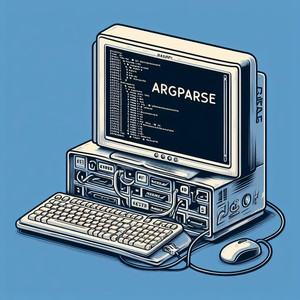

Pojďme si pomocí argparse napsat skript, který nám vypíše soubor. Skript by měl kromě argumentu s názvem souboru akceptovat přepínač zobrazující nápovědu, měl by umět zapnout/vypnout zobrazování čísel řádků na začátku řádky a případně zobrazit ladící informace.

Pomocí argparse je to opravdu snadné:

In [81]:
# %%writefile mi nespustí buňku, ale uloží ji jako soubor
%%writefile printfile.py

from argparse import ArgumentParser

# založím parser s popisem skriptu
parser = ArgumentParser(description="Prints file to standard output")

# přidávám jednotlivé argumenty
parser.add_argument("-n", "--number", # název
                    default=False, # výchozí hodnota
                    action='store_true', # díky tomu bude -n sloužit jen jako flag
                    help="number all output lines")
parser.add_argument("-e", "--show-ends",
                    default=False,
                    action='store_true',
                    help="display $ at end of each line")
parser.add_argument("-D", "--debug", # -D bude očekávat za sebou hodnotu
                    default=False, # pokud -D nebude, bude False
                    help="True: show debugging info")
parser.add_argument("file", # poziční argument s názvem souboru
                    help="file to print to standard output")

# vytvoří Namespace s argumenty
args = parser.parse_args()

# samotný skript
if args.debug == "True":
    print("Some debugging info:")
    print(args)
else:
    with open(args.file, mode="rt", encoding="utf-8") as file:
        for i, line in enumerate(file):
            if args.number:
                print(f"{i: >5d}  ", end="")
            print(line[:-1], end="")
            if args.show_ends:
                print("$", end="")
            print()

Overwriting printfile.py


In [82]:
#!cat printfile.py
!ls -la
# nápověda
print('-' * 80)
!python printfile.py -h

total 1820
drwxr-xr-x 1 root root    4096 Apr  3 13:02 .
drwxr-xr-x 1 root root    4096 Apr  3 13:05 ..
-rw-r--r-- 1 root root      65 Apr  3 12:48 bin.txt
drwxr-xr-x 4 root root    4096 Apr  1 13:23 .config
drwxr-xr-x 3 root root    4096 Apr  3 11:18 dir1
-rw-r--r-- 1 root root     457 Apr  3 11:24 mujprogram.py
lrwxrwxrwx 1 root root      19 Apr  3 10:59 odkaz -> /content/soubor.txt
-rw-r--r-- 1 root root      16 Apr  3 13:02 pokus3.txt
-rw-r--r-- 1 root root      21 Apr  3 13:01 pokus.txt
-rw-r--r-- 1 root root    1381 Apr  3 13:15 printfile.py
drwxr-xr-x 1 root root    4096 Apr  1 13:24 sample_data
-rw-r--r-- 1 root root       0 Apr  3 12:52 soubor.txt
-rw-r--r-- 1 root root 1819904 Apr  3 11:27 time_series_covid19_confirmed_global.csv
--------------------------------------------------------------------------------
usage: printfile.py [-h] [-n] [-e] [-D DEBUG] file

Prints file to standard output

positional arguments:
  file                  file to print to standard output

optio

In [83]:
# pouze pozicni argument
!python printfile.py sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [84]:
# prepinace
!python printfile.py -n sample_data/README.md

    0  This directory includes a few sample datasets to get you started.
    1  
    2  *   `california_housing_data*.csv` is California housing data from the 1990 US
    3      Census; more information is available at:
    4      https://developers.google.com/machine-learning/crash-course/california-housing-data-description
    5  
    6  *   `mnist_*.csv` is a small sample of the
    7      [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    8      described at: http://yann.lecun.com/exdb/mnist/
    9  
   10  *   `anscombe.json` contains a copy of
   11      [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
   12      was originally described in
   13  
   14      Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
   15      Statistician. 27 (1): 17-21. JSTOR 2682899.
   16  
   17      and our copy was prepared by the
   18      [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45

In [85]:
# argument s hodnotou
!python printfile.py --debug True sample_data/README.md

Some debugging info:
Namespace(number=False, show_ends=False, debug='True', file='sample_data/README.md')


In [86]:
# nedefinovany argument
!python printfile.py --neexistujici_prepinac True sample_data/README.md

usage: printfile.py [-h] [-n] [-e] [-D DEBUG] file
printfile.py: error: unrecognized arguments: --neexistujici_prepinac sample_data/README.md


### alternativa k argparse
Bez argparse je nutné si poradit se seznamem v proměnné **sys.argv**:

In [88]:
%%writefile mujprogram.py

import argparse
import sys

if __name__ == "__main__":
    parser = argparse.ArgumentParser(prog='mujprogram.py', description='Skvely program.', epilog='Jeste neco na zaver')
    parser.add_argument('-dir', action='store', default='./data',
                        help='Output directory. [Default = %(default)s]')

    args = parser.parse_args()
    print(f'Zparsovane argumenty: {args}')

    print(f'Raw pristup pres sys.arg v nemz je: {sys.argv}')

Overwriting mujprogram.py


In [89]:
!python3 mujprogram.py --help
print('-' * 80)
!python3 mujprogram.py -dir nejaky

usage: mujprogram.py [-h] [-dir DIR]

Skvely program.

options:
  -h, --help  show this help message and exit
  -dir DIR    Output directory. [Default = ./data]

Jeste neco na zaver
--------------------------------------------------------------------------------
Zparsovane argumenty: Namespace(dir='nejaky')
Raw pristup pres sys.arg v nemz je: ['mujprogram.py', '-dir', 'nejaky']


# Příklad zpracování online open dat

Jako ukázka pro práci se soubory poslouží následujicí příklad. Úkolem je stáhnout, zpracovat a vizualizovat set otevřených dat o potvrzených případech COVID19. Data jsou z [CSSEGISandData@github](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) (poslední aktualizace zdroje 9. 3. 2023). Samozřejmě v praxi by se asi použil `csv.reader()`, ale zde je cílem demonstrovat práci se souborem...

In [90]:
!rm -f time_series_covid19_confirmed_global.csv || true
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!head -5 time_series_covid19_confirmed_global.csv

--2024-04-03 13:20:57--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819904 (1.7M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]   1.74M  --.-KB/s    in 0.06s   

2024-04-03 13:20:57 (29.9 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [1819904/1819904]

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,

In [91]:
with open('time_series_covid19_confirmed_global.csv', mode='rt', encoding='utf-8') as file:
  line = file.readline()[:-1] # remove \n from end of the line
  header = line.split(',')
  max_date = header[-1]
  categories = {val:index for index,val in enumerate(header)}
  data = []
  for line in file:
    if '"' in line: # some countries have "," in their name - this deals with it
      i,j=[x for x in range(len(line)) if line[x]=='"']
      k,=[x for x in range(i,j) if line[x]==',']
      line="".join((line[:i],line[i+1:k],line[k+1:j],line[j+1:]))
    row = line[:-1].split(',')
    data.append(row)

In [92]:
def get_data(data, country, region=""):
  """Extracts data for single country"""
  return [x[4:] for x in data if x[categories['Country/Region']]==country and x[categories['Province/State']]==region][0]

def get_series(data, tresh):
  """Adjusts data only after start of epidemics"""
  return [int(x) for x in data if int(x)>tresh]

In [ ]:
import plotly.graph_objects as go

start = 100 # minimum number of cases for day 0

fig = go.Figure()

fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Italy'), start), name="Italy"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Czechia'), start), name="Czech Republic"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Germany'), start), name="Germany"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Austria'), start), name="Austria"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, "United Kingdom"), start), name="Britain"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, "US"), start), name="U.S.A."))
fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Korea South'), start), name="South Korea"))
fig.add_trace(go.Scatter(y=get_series(get_data(data, 'Spain'), start), name="Spain"))

fig.update_layout(
    title="Number of COVID19 confirmed cases (as of "+max_date+")",
    xaxis_title="Days since first day with "+str(start)+" cases",
    yaxis_title="Cases (logarithmic scale)",
    yaxis_type="log", # switch log scale on for y axis
    hovermode='x' # compare data on hoover by default
  )

fig.show()